<a href="https://colab.research.google.com/github/Praneeth-18/DataMining5/blob/main/Video%20dataset/Video_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# Assuming you've uploaded a ZIP of the extracted frames to Google Drive
!unzip '/content/drive/MyDrive/Datasets for CMPE 255/video dataset.zip' -d '/content/data'

Archive:  /content/drive/MyDrive/Datasets for CMPE 255/video dataset.zip
  inflating: /content/data/v_Bowling_g13_c04.avi  
  inflating: /content/data/v_Bowling_g15_c03.avi  
  inflating: /content/data/v_Bowling_g16_c02.avi  
  inflating: /content/data/v_Bowling_g17_c05.avi  
  inflating: /content/data/v_Bowling_g18_c05.avi  
  inflating: /content/data/v_HighJump_g08_c01.avi  
  inflating: /content/data/v_HighJump_g11_c05.avi  
  inflating: /content/data/v_HighJump_g12_c04.avi  
  inflating: /content/data/v_HighJump_g13_c04.avi  
  inflating: /content/data/v_HighJump_g25_c03.avi  
  inflating: /content/data/v_HorseRiding_g08_c04.avi  
  inflating: /content/data/v_HorseRiding_g09_c04.avi  
  inflating: /content/data/v_HorseRiding_g10_c04.avi  
  inflating: /content/data/v_HorseRiding_g11_c02.avi  
  inflating: /content/data/v_HorseRiding_g12_c04.avi  
  inflating: /content/data/v_PlayingGuitar_g14_c06.avi  
  inflating: /content/data/v_PlayingGuitar_g14_c07.avi  
  inflating: /content/d

In [8]:
import cv2
import os

frame_directory = '/content/data'

all_files = os.listdir(frame_directory)

# Directory to store extracted frames
extracted_frames_path = "/content/extracted_frames"
if not os.path.exists(extracted_frames_path):
    os.makedirs(extracted_frames_path)

# Function to extract frames from a video
def extract_frames_from_video(video_path, output_path):
    vidcap = cv2.VideoCapture(video_path)
    success, image = vidcap.read()
    count = 0
    while success:
        frame_file_path = os.path.join(output_path, f"frame_{count}.jpg")
        cv2.imwrite(frame_file_path, image)
        success, image = vidcap.read()
        count += 1

# Extract frames from all videos
for video_file in all_files:
    video_path = os.path.join(frame_directory, video_file)
    output_path = os.path.join(extracted_frames_path, os.path.splitext(video_file)[0])
    if not os.path.exists(output_path):
        os.makedirs(output_path)
    extract_frames_from_video(video_path, output_path)

# Verify frames extraction
extracted_files = os.listdir(extracted_frames_path)
extracted_files_count = sum([len(os.listdir(os.path.join(extracted_frames_path, dir))) for dir in extracted_files])
extracted_files, extracted_files_count


(['v_PlayingGuitar_g17_c05',
  'v_Bowling_g17_c05',
  'v_RockClimbingIndoor_g01_c03',
  'v_Surfing_g10_c01',
  'v_Surfing_g10_c06',
  'v_HorseRiding_g10_c04',
  'v_PlayingGuitar_g14_c07',
  'v_RockClimbingIndoor_g25_c07',
  'v_Bowling_g16_c02',
  'v_HorseRiding_g12_c04',
  'v_PlayingGuitar_g17_c02',
  'v_RockClimbingIndoor_g25_c02',
  'v_PlayingGuitar_g14_c06',
  'v_HighJump_g12_c04',
  'v_Bowling_g13_c04',
  'v_RockClimbingIndoor_g03_c06',
  'v_Surfing_g13_c04',
  'v_Surfing_g09_c01',
  'v_HighJump_g11_c05',
  'v_HighJump_g08_c01',
  'v_Bowling_g18_c05',
  'v_HighJump_g13_c04',
  'v_HorseRiding_g08_c04',
  'v_RockClimbingIndoor_g23_c06',
  'v_HighJump_g25_c03',
  'v_HorseRiding_g11_c02',
  'v_Surfing_g12_c02',
  'v_PlayingGuitar_g16_c02',
  'v_HorseRiding_g09_c04',
  'v_Bowling_g15_c03'],
 6417)

In [10]:
sample_frame = Image.open(all_frame_paths[0])
sample_frame.show()


In [11]:
sample_feature = extract_features(all_frame_paths[0])
print(sample_feature)


Error processing: /content/extracted_frames/v_PlayingGuitar_g17_c05/frame_98.jpg
None


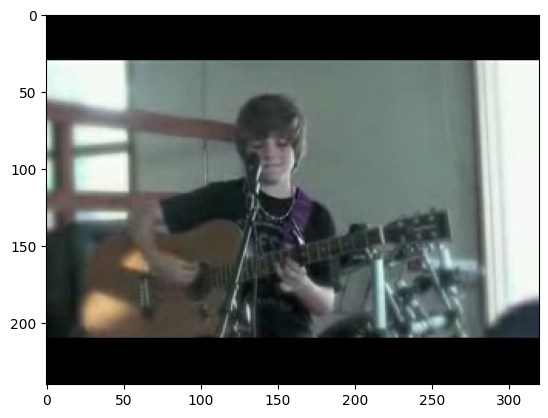

In [14]:
import tensorflow as tf
import matplotlib.pyplot as plt

img_content = tf.io.read_file(frame_path)
img_decoded = tf.image.decode_image(img_content)
plt.imshow(img_decoded)
plt.show()


In [12]:
frame_path = "/content/extracted_frames/v_PlayingGuitar_g17_c05/frame_98.jpg"
img = Image.open(frame_path)
img.show()


In [18]:
import tensorflow_hub as hub

# Load the pre-trained model for feature extraction
feature_extractor = hub.KerasLayer("https://tfhub.dev/google/imagenet/mobilenet_v2_100_224/feature_vector/4")

# Continue with the processing of the image as before
img_resized = tf.image.resize(img_decoded, [224, 224])
img_normalized = tf.expand_dims(img_resized, 0) / 255.0

# Extract features using the pre-trained model
sample_feature_output = feature_extractor(img_normalized)
print(sample_feature_output)


tf.Tensor([[0.         0.22467062 1.2289454  ... 0.29577893 0.03669023 1.5893109 ]], shape=(1, 1280), dtype=float32)


In [19]:
# Adjusted feature extraction function
def extract_features(image_path):
    try:
        img = tf.image.decode_jpeg(tf.io.read_file(image_path), channels=3)
        img = tf.image.resize(img, [224, 224])
        img = tf.expand_dims(img, 0) / 255.0
        return feature_extractor(img).numpy()[0]
    except Exception as e:
        print(f"Error processing: {image_path}. Error: {e}")
        return None

# Extract features for all frames
all_features = [extract_features(frame_path) for frame_path in all_frame_paths]

# Filter out None values after feature extraction
features_and_labels = list(zip(all_features, all_labels))
features_and_labels = [(feat, label) for feat, label in features_and_labels if feat is not None]

# Ensure that the list isn't empty
if features_and_labels:
    all_features, all_labels = zip(*features_and_labels)
else:
    all_features, all_labels = [], []

len(all_features), len(all_labels)


(6417, 6417)

In [20]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(all_features, all_labels, test_size=0.2, random_state=42)


In [21]:
from sklearn.svm import SVC

# Create a linear SVM classifier
clf = SVC(kernel='linear')

# Train the classifier
clf.fit(X_train, y_train)

SVC(kernel='linear')

In [22]:
from sklearn.metrics import accuracy_score, classification_report

# Make predictions on the test set
y_pred = clf.predict(X_test)

# Calculate the accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

# Print a detailed classification report
report = classification_report(y_test, y_pred)
print(report)

Accuracy: 100.00%
                    precision    recall  f1-score   support

           Bowling       1.00      1.00      1.00       113
          HighJump       1.00      1.00      1.00        92
       HorseRiding       1.00      1.00      1.00       197
     PlayingGuitar       1.00      1.00      1.00       279
RockClimbingIndoor       1.00      1.00      1.00       403
           Surfing       1.00      1.00      1.00       200

          accuracy                           1.00      1284
         macro avg       1.00      1.00      1.00      1284
      weighted avg       1.00      1.00      1.00      1284

